# MIT 15.S60 Pre-assignment 5

NOTE: This notebook assumes you have already installed Ollama and downloaded the gemma3:1b model. You can confirm this by running the command "ollama list" from the CLI: 

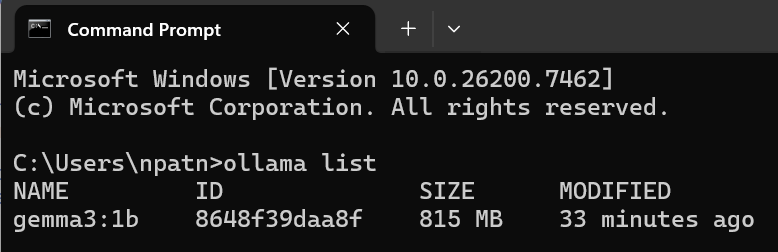

In [ ]:
# From the command line, we're going to install all packages listed in the requirements.txt file. 
!pip3 install -r requirements.txt

## Section 1: Ollama

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_ollama import ChatOllama
import ollama

In [ ]:
# Now let's try submitting a few different prompts to our downloaded model (gemma3:1b). 
# We're going to create a template prompt that can be modified with different inputs.
template = "What is the capital of {country}?"
prompt = PromptTemplate(template=template, input_variables=["country"])

# Next, we create an instance of the ChatOllama class, specifying our model.
llm = ChatOllama(model="gemma3:1b")

# Finally, we can generate responses for different countries by formatting the prompt with different inputs.
countries = ["Japan", "Norway", "Brazil"] 

for country in countries:

    formatted_prompt = prompt.format(country=country)
    response = llm.invoke(formatted_prompt)

    print("----------------------------------")
    print(f"Q: {formatted_prompt}\nA: {response.content}\n")

## Section 2: Hugging Face

In [ ]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

In [ ]:
# The first time from_pretrained() is called, the model is downloaded and cached locally. 
# On subsequent calls, the model is loaded from the local cache unless an update is available.
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForMaskedLM.from_pretrained("bert-base-uncased")

# Put the model in evaluation mode
model.eval()

# Tokenize a simple masked sentence as input
text = "Nairobi is the capital of [MASK]."
inputs = tokenizer(text, return_tensors="pt")

# Run the model
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted token ID for [MASK]
mask_index = (inputs["input_ids"] == tokenizer.mask_token_id).nonzero(as_tuple=True)[1] # 0dim is batch, 1dim is seq length
logits = outputs.logits[0, mask_index]
predicted_token_id = logits.argmax(dim=-1)

# Decode and print result
predicted_word = tokenizer.decode(predicted_token_id)
print("----------------------------------")
print("Predicted word:", predicted_word)